## Inflation vs Bitcoin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
inflation_df = pd.read_csv("InflationRate.csv")
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  11 non-null     int64  
 1   United Arab Emirates  11 non-null     float64
 2   Switzerland           11 non-null     float64
 3   China                 11 non-null     float64
 4   United Kingdom        11 non-null     float64
 5   Lebanon               11 non-null     float64
 6   United States         11 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 748.0 bytes


In [3]:
inflation_df['Year'] = pd.to_datetime(inflation_df['Year'], format='%Y')
inflation_df.set_index('Year', inplace=True)
inflation_df.index = inflation_df.index.year

In [4]:
#drop first row
inflation_df = inflation_df.iloc[1:]
inflation_df['Avg'] = inflation_df.mean(axis=1)

In [5]:
btc_df = pd.read_csv("BTC.csv")
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               5474 non-null   float64
 1   high               5474 non-null   float64
 2   low                5474 non-null   float64
 3   close              5474 non-null   float64
 4   volume             5474 non-null   float64
 5   marketCap          5474 non-null   float64
 6   CirculatingSupply  5474 non-null   float64
 7   SupplyGrowthRate   5474 non-null   float64
 8   timestamp          5474 non-null   object 
 9   Halving            4 non-null      float64
dtypes: float64(9), object(1)
memory usage: 427.8+ KB


In [6]:
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp']).dt.normalize()
btc_df.set_index('timestamp', inplace=True)

In [7]:
# set create a new dataframe from eth_df to be grouprd by year like inflation_df
btc_df_yearly = btc_df.resample('Y').last()
btc_df_yearly.index= btc_df_yearly.index.year
btc_df_yearly = btc_df_yearly.rename(columns={'close': 'BTC_Close'})

/tmp/ipython-input-2257108800.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  btc_df_yearly = btc_df.resample('Y').last()


In [8]:
btc_df_yearly

,open,high,low,BTC_Close,volume,marketCap,CirculatingSupply,SupplyGrowthRate,Halving
timestamp,,,,,,,,,
2010,0.299905,0.325635,0.259194,0.300000,1.454400e+03,1.505962e+06,5019875.00,1.619938e-01,NaN
2011,4.320730,5.419351,4.320730,4.610716,1.292017e+05,3.689138e+07,8001225.00,9.713669e-02,NaN
2012,13.483733,16.588828,12.698131,13.528579,1.499791e+04,1.435885e+08,10613717.71,3.712181e-02,1.0
2013,760.320007,760.580017,738.169983,754.010010,2.089730e+07,9.191325e+09,12189924.84,-6.490000e-07,NaN
2014,310.914001,320.192993,310.210999,320.192993,1.394290e+07,4.377511e+09,13671475.29,2.762184e-02,NaN
2015,425.875000,432.920990,418.734985,430.566986,4.599660e+07,6.471217e+09,15029525.49,2.362784e-02,NaN
2016,960.627014,963.742981,947.236023,963.742981,9.913510e+07,1.549255e+10,16075400.32,1.150908e-02,1.0
2017,12897.700200,14377.400390,12755.599610,14156.400390,1.213630e+10,2.370000e+11,16774449.54,1.207214e-02,NaN
2018,3866.838999,3868.742988,3725.867493,3742.700335,4.661841e+09,6.533150e+10,17455712.00,1.102913e-02,NaN


In [9]:
# combine the 2 datasets
btc_inflation_df = pd.merge(inflation_df, btc_df_yearly, left_index=True, right_index=True, how='inner')

In [10]:
btc_inflation_df

,United Arab Emirates,Switzerland,China,United Kingdom,Lebanon,United States,Avg,open,high,low,BTC_Close,volume,marketCap,CirculatingSupply,SupplyGrowthRate,Halving
2015,4.069966,-1.143909,1.437024,0.368047,-3.749145,0.118627,0.183435,425.875000,432.920990,418.734985,430.566986,4.599660e+07,6.471217e+09,15029525.49,0.023628,NaN
2016,1.617488,-0.434619,2.000002,1.008417,-0.783360,1.261583,0.778252,960.627014,963.742981,947.236023,963.742981,9.913510e+07,1.549255e+10,16075400.32,0.011509,1.0
2017,1.966826,0.533788,1.593136,2.557756,4.321352,2.130110,2.183828,12897.700200,14377.400390,12755.599610,14156.400390,1.213630e+10,2.370000e+11,16774449.54,0.012072,NaN
2018,3.068634,0.936335,2.074790,2.292840,6.076989,2.442583,2.815362,3866.838999,3868.742988,3725.867493,3742.700335,4.661841e+09,6.533150e+10,17455712.00,0.011029,NaN
2019,-1.931081,0.362886,2.899234,1.738105,3.005389,1.812210,1.314457,7294.438896,7335.290051,7169.777686,7193.598978,2.116795e+10,1.300000e+11,18133637.00,0.010131,NaN
2020,-2.079403,-0.725875,2.419422,0.989487,84.864333,1.233584,14.450258,28841.573760,29244.876690,28201.991990,29001.719820,4.675496e+10,5.390000e+11,18586868.00,0.005445,1.0
2021,0.179935,0.581814,0.981015,2.518371,154.756096,4.697859,27.285848,47169.372860,48472.527490,45819.954550,46306.446120,3.697417e+10,8.760000e+11,18916143.00,0.004689,NaN
2022,5.291226,2.835028,1.973576,7.922049,171.205491,8.002800,32.871695,16603.674700,16628.987000,16517.519220,16547.495370,1.123919e+10,3.190000e+11,19248612.00,0.005388,NaN
2023,1.626708,2.135401,0.234837,6.793967,221.341644,4.116338,39.374816,42152.098450,42860.937390,41998.255350,42265.185650,1.639750e+10,8.280000e+11,19586125.00,0.005269,NaN
2024,1.663365,1.062340,0.218129,3.271573,45.243042,2.949525,9.067996,92643.251220,96090.603790,91914.027780,93429.202810,4.362511e+10,1.850000e+12,19803051.79,-0.001344,1.0


In [11]:
#standardize eth_inflation_df
btc_inflation_df = (btc_inflation_df - btc_inflation_df.mean()) / btc_inflation_df.std()

In [12]:
# create linear regression of ETH_close as a function United Arab, ... , United States seperatly
countries = btc_inflation_df.columns[0:6]
dependents = btc_inflation_df.columns[-6:-1]
r2={}
for country in countries:
  for dependent in dependents:
    y=btc_inflation_df[dependent].values.reshape(-1,1)
    x=btc_inflation_df[country].values.reshape(-1,1)
    model=LinearRegression()
    model.fit(x,y)
    name=country + " " + dependent
    r2[name]=r2_score(y,model.predict(x))

In [13]:
# compute the highest scores and their names
highest_scores = sorted(r2.items(), key=lambda x: x[1], reverse=True)[:5]

In [14]:
highest_scores

[('China marketCap', 0.5439995587466713),
 ('China BTC_Close', 0.5384091220373579),
 ('Lebanon CirculatingSupply', 0.51307036879617),
 ('Switzerland CirculatingSupply', 0.48745676761490864),
 ('United States CirculatingSupply', 0.4411834552983316)]

In [15]:
for dependent in dependents:
  y=btc_inflation_df[dependent].values.reshape(-1,1)
  x=btc_inflation_df["Avg"].values.reshape(-1,1)
  model=LinearRegression()
  model.fit(x,y)
  print(f"Avg {dependent}: {r2_score(y,model.predict(x))}")

Avg BTC_Close: 0.1453453727326961
Avg volume: 0.0768346228793686
Avg marketCap: 0.14264421417056894
Avg CirculatingSupply: 0.512416732861375
Avg SupplyGrowthRate: 0.2923329201617454


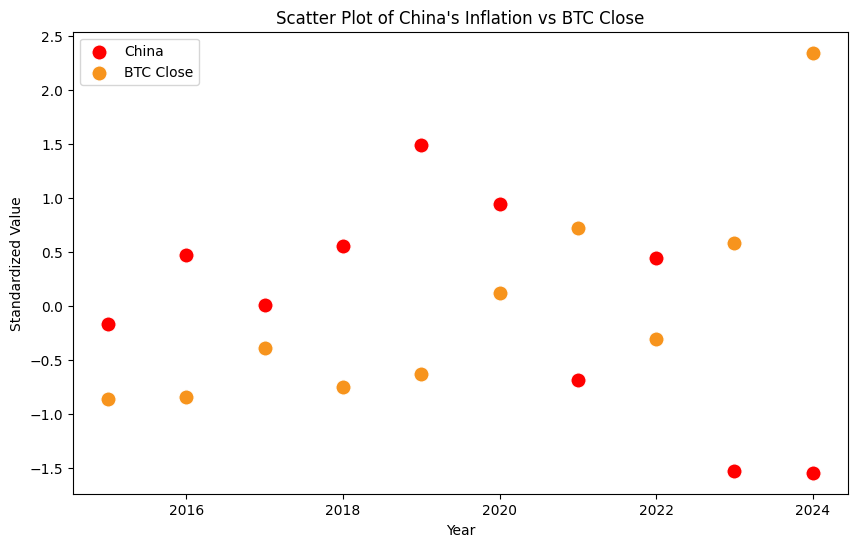

In [16]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(btc_inflation_df['China'], label='China',color ='Red', s=120)
sns.scatterplot(btc_inflation_df['BTC_Close'], label='BTC Close', color ='#F7941D',s=120)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of China's Inflation vs BTC Close")
plt.legend()
plt.show()

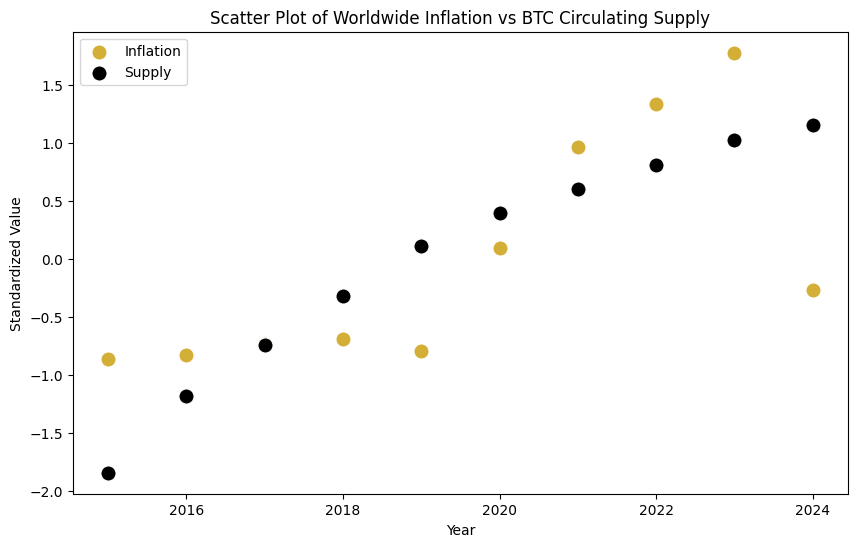

In [17]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(btc_inflation_df['Avg'], label='Inflation',color ='#d4af37', s=120)
sns.scatterplot(btc_inflation_df['CirculatingSupply'], label='Supply', color ='Black',s=120)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of Worldwide Inflation vs BTC Circulating Supply")
plt.legend()
plt.show()

## Exchange Rate vs Bitcoin

In [18]:
exchange_df=pd.read_csv("ExchangeRate.csv")
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   United Arab Emirates  11 non-null     float64
 1   Switzerland           11 non-null     float64
 2   China                 11 non-null     float64
 3   United Kingdom        11 non-null     float64
 4   Lebanon               11 non-null     float64
 5   Saudi Arabia          11 non-null     float64
 6   Year                  11 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 748.0 bytes


In [19]:
exchange_df['Year'] = pd.to_datetime(exchange_df['Year'], format='%Y')
exchange_df.set_index('Year', inplace=True)
exchange_df.index = exchange_df.index.year

In [20]:
exchange_df['Avg']=exchange_df.mean(axis=1)

In [21]:
#drop United Arab Emirates and Saudi Arabia
exchange_df.drop(columns=['United Arab Emirates','Saudi Arabia'], inplace=True)

In [22]:
# combine the 2 datasets
btc_exchange_df = pd.merge(exchange_df, btc_df_yearly, left_index=True, right_index=True, how='inner')

In [23]:
#standardize
btc_exchange_df = (btc_exchange_df - btc_exchange_df.mean()) / btc_exchange_df.std()

In [24]:
btc_exchange_df

,Switzerland,China,United Kingdom,Lebanon,Avg,open,high,low,BTC_Close,volume,marketCap,CirculatingSupply,SupplyGrowthRate,Halving
2014,-0.767004,-1.676973,-2.192720,-0.345337,-0.345362,-0.797691,-0.794393,-0.794986,-0.798255,-0.999839,-0.776380,-1.960449,2.014996,NaN
2015,0.418074,-1.422333,-1.456204,-0.345337,-0.345355,-0.793652,-0.790561,-0.791134,-0.794391,-0.998012,-0.772672,-1.277702,1.545112,NaN
2016,1.007996,-0.159083,-0.101835,-0.345337,-0.345336,-0.774864,-0.772518,-0.772375,-0.775726,-0.994983,-0.756696,-0.751898,0.119370,NaN
2017,0.989982,0.187115,0.469908,-0.345337,-0.345330,-0.355466,-0.316568,-0.353234,-0.313901,-0.308905,-0.364430,-0.400458,0.185613,NaN
2018,0.815670,-0.245485,0.038135,-0.345337,-0.345337,-0.672757,-0.673773,-0.673747,-0.678445,-0.734924,-0.668437,-0.057960,0.062905,NaN
2019,1.221139,0.640412,0.571670,-0.345337,-0.345324,-0.552331,-0.555940,-0.551504,-0.557642,0.205868,-0.553916,0.282860,-0.042713,NaN
2020,-0.182186,0.617335,0.517464,-0.345337,-0.345326,0.204707,0.188799,0.195039,0.205778,1.664243,0.170381,0.510718,-0.594053,NaN
2021,-0.826097,-0.751349,-0.315314,-0.345337,-0.345346,0.848636,0.842375,0.820393,0.811552,1.106770,0.767173,0.676258,-0.682955,NaN
2022,0.224565,0.121688,1.009916,-0.345337,-0.345331,-0.225260,-0.240033,-0.219704,-0.230197,-0.360038,-0.219216,0.843403,-0.600795,NaN
2023,-1.219732,1.172426,0.903522,0.122804,0.122818,0.672359,0.651629,0.684740,0.670083,-0.066031,0.682170,1.013085,-0.614722,NaN


In [25]:
# create linear regression of ETH_close as a function United Arab, ... , United States seperatly
countries = btc_exchange_df.columns[0:4]
dependents = btc_exchange_df.columns[-6:-1]
r2={}
for country in countries:
  for dependent in dependents:
    y=btc_exchange_df[dependent].values.reshape(-1,1)
    x=btc_exchange_df[country].values.reshape(-1,1)
    model=LinearRegression()
    model.fit(x,y)
    name=country + " " + dependent
    r2[name]=r2_score(y,model.predict(x))

In [26]:
# compute the highest scores and their names
highest_scores = sorted(r2.items(), key=lambda x: x[1], reverse=True)[:5]

In [27]:
highest_scores

[('United Kingdom CirculatingSupply', 0.7479916406047986),
 ('United Kingdom SupplyGrowthRate', 0.74703423522686),
 ('Lebanon marketCap', 0.7429075130798852),
 ('Lebanon BTC_Close', 0.7243200439932963),
 ('China SupplyGrowthRate', 0.6993965246102063)]

In [28]:
for dependent in dependents:
  y=btc_exchange_df[dependent].values.reshape(-1,1)
  x=btc_exchange_df["Avg"].values.reshape(-1,1)
  model=LinearRegression()
  model.fit(x,y)
  print(f"Avg {dependent}: {r2_score(y,model.predict(x))}")

Avg BTC_Close: 0.7243236627977897
Avg volume: 0.2418534336177296
Avg marketCap: 0.7429110003008308
Avg CirculatingSupply: 0.17738649085871427
Avg SupplyGrowthRate: 0.24270781740276348


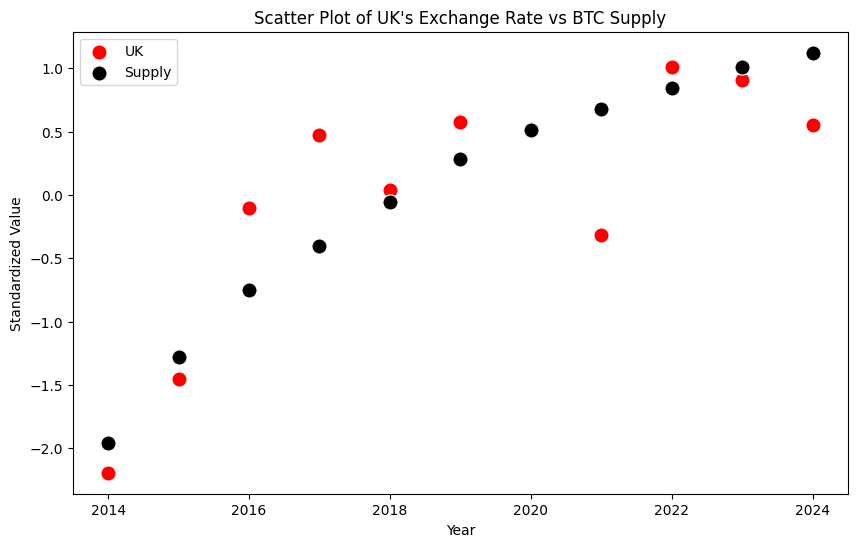

In [29]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(btc_exchange_df['United Kingdom'], label='UK',color ='red', s=120)
sns.scatterplot(btc_exchange_df['CirculatingSupply'], label='Supply', color ='black',s=120)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of UK's Exchange Rate vs BTC Supply")
plt.legend()
plt.show()

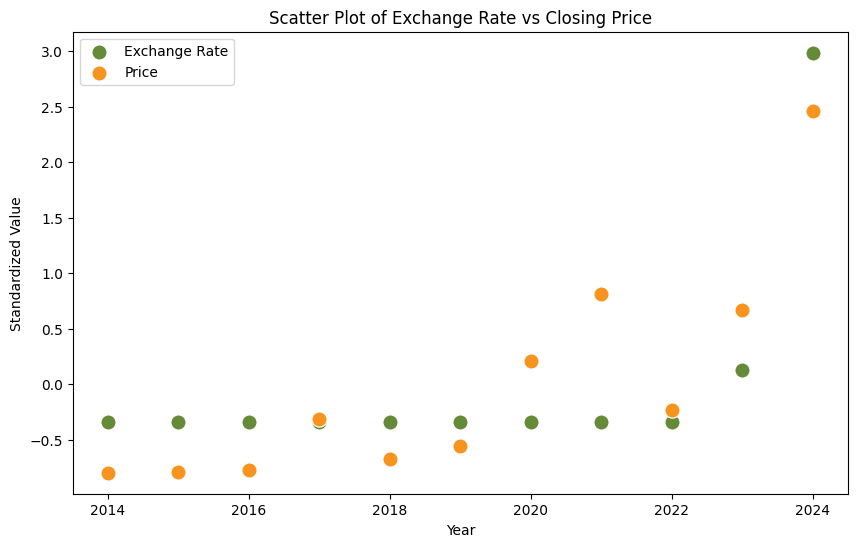

In [30]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(btc_exchange_df['Avg'], label='Exchange Rate',color ='#658b38', s=120)
sns.scatterplot(btc_exchange_df['BTC_Close'], label='Price', color ='#F7941D',s=120)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of Exchange Rate vs Closing Price")
plt.legend()
plt.show()

##Unemployment Rate vs Bitcoin

In [31]:
unemp_df=pd.read_csv('UnemploymentRate.csv')
unemp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   United Arab Emirates  11 non-null     float64
 1   Switzerland           11 non-null     float64
 2   China                 11 non-null     float64
 3   France                11 non-null     float64
 4   United Kingdom        11 non-null     float64
 5   Saudi Arabia          11 non-null     float64
 6   United States         11 non-null     float64
 7   Year                  11 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 836.0 bytes


In [32]:
unemp_df['Year'] = pd.to_datetime(unemp_df['Year'], format='%Y')
unemp_df.set_index('Year', inplace=True)
unemp_df.index = unemp_df.index.year

In [33]:
unemp_df['Avg']=unemp_df.mean(axis=1)

In [34]:
# combine the 2 datasets
btc_unemp_df = pd.merge(unemp_df, btc_df_yearly, left_index=True, right_index=True, how='inner')

In [35]:
#standardize
btc_unemp_df = (btc_unemp_df - btc_unemp_df.mean()) / btc_unemp_df.std()

In [36]:
btc_unemp_df

,United Arab Emirates,Switzerland,China,France,United Kingdom,Saudi Arabia,United States,Avg,open,high,low,BTC_Close,volume,marketCap,CirculatingSupply,SupplyGrowthRate,Halving
2014,-0.747174,0.628482,-1.115243,1.329711,2.219746,0.213084,0.993713,1.029391,-0.797691,-0.794393,-0.794986,-0.798255,-0.999839,-0.776380,-1.960449,2.014996,NaN
2015,-0.574312,0.553305,-1.081118,1.397138,1.170104,-0.034822,0.342133,0.561636,-0.793652,-0.790561,-0.791134,-0.794391,-0.998012,-0.772672,-1.277702,1.545112,NaN
2016,-1.066304,0.905135,-1.166429,1.149903,0.372326,-0.034822,0.040557,0.133012,-0.774864,-0.772518,-0.772375,-0.775726,-0.994983,-0.756696,-0.751898,0.119370,NaN
2017,0.026715,0.541277,-1.456485,0.610482,-0.133884,0.224719,-0.336596,-0.061087,-0.355466,-0.316568,-0.353234,-0.313901,-0.308905,-0.364430,-0.400458,0.185613,NaN
2018,-0.273799,0.288681,0.300914,0.284997,-0.575578,0.349119,-0.673393,-0.151010,-0.672757,-0.673773,-0.673747,-0.678445,-0.734924,-0.668437,-0.057960,0.062905,NaN
2019,-0.147477,-0.670582,0.676281,-0.216964,-1.181045,-0.002604,-0.839956,-0.595443,-0.552331,-0.555940,-0.551504,-0.557642,0.205868,-0.553916,0.282860,-0.042713,NaN
2020,2.462737,0.601418,1.461139,-0.554935,-0.112792,1.808814,2.378320,1.921107,0.204707,0.188799,0.195039,0.205778,1.664243,0.170381,0.510718,-0.594053,NaN
2021,0.881716,1.190809,0.608032,-0.669812,0.316494,0.878941,0.392762,0.617611,0.848636,0.842375,0.820393,0.811552,1.106770,0.767173,0.676258,-0.682955,NaN
2022,0.571895,-1.488511,0.590970,-1.142639,-1.043326,-0.044667,-0.853898,-0.815197,-0.225260,-0.240033,-0.219704,-0.230197,-0.360038,-0.219216,0.843403,-0.600795,NaN
2023,-0.386824,-1.726071,0.539784,-1.116000,-0.724463,-1.459613,-0.862703,-1.368211,0.672359,0.651629,0.684740,0.670083,-0.066031,0.682170,1.013085,-0.614722,NaN


In [37]:
# create linear regression of ETH_close as a function United Arab, ... , United States seperatly
countries = btc_unemp_df.columns[0:8]
dependents = btc_unemp_df.columns[-6:-1]
r2={}
for country in countries:
  for dependent in dependents:
    y=btc_unemp_df[dependent].values.reshape(-1,1)
    x=btc_unemp_df[country].values.reshape(-1,1)
    model=LinearRegression()
    model.fit(x,y)
    name=country + " " + dependent
    r2[name]=r2_score(y,model.predict(x))

In [38]:
# compute the highest scores and their names
highest_scores = sorted(r2.items(), key=lambda x: x[1], reverse=True)[:5]
highest_scores

[('France CirculatingSupply', 0.9239863672786548),
 ('France SupplyGrowthRate', 0.7688438707166034),
 ('United Kingdom CirculatingSupply', 0.6685356730196507),
 ('China CirculatingSupply', 0.660181063242119),
 ('United Kingdom SupplyGrowthRate', 0.5876703712623107)]

In [39]:
for dependent in dependents:
  y=btc_unemp_df[dependent].values.reshape(-1,1)
  x=btc_unemp_df["Avg"].values.reshape(-1,1)
  model=LinearRegression()
  model.fit(x,y)
  print(f"Avg {dependent}: {r2_score(y,model.predict(x))}")

Avg BTC_Close: 0.15055185595284382
Avg volume: 0.0043566265211840705
Avg marketCap: 0.16029405278940234
Avg CirculatingSupply: 0.25734231483950576
Avg SupplyGrowthRate: 0.20264411838613627


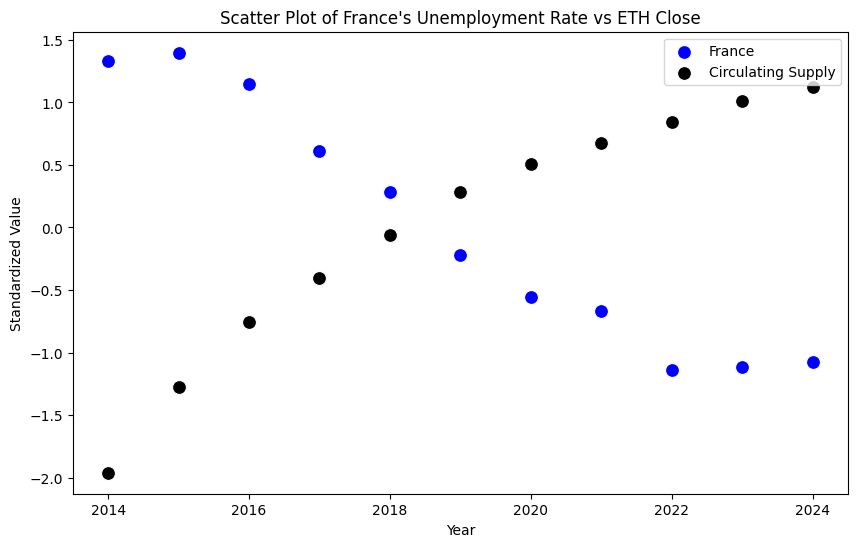

In [40]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(btc_unemp_df['France'], label='France',color ='Blue', s=100)
sns.scatterplot(btc_unemp_df['CirculatingSupply'], label='Circulating Supply', color ='black',s=100)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of France's Unemployment Rate vs ETH Close")
plt.legend()
plt.show()

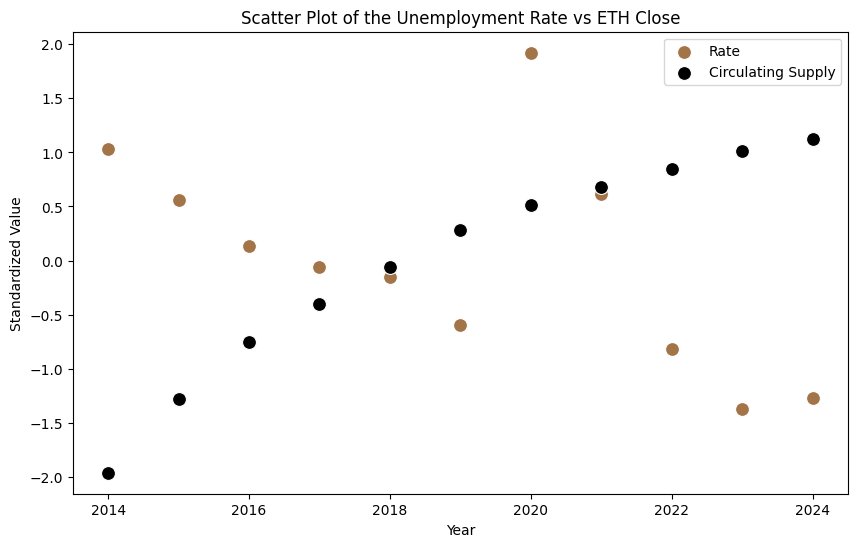

In [41]:
#plot based on highest scores
plt.figure(figsize=(10, 6))
sns.scatterplot(btc_unemp_df['Avg'], label='Rate',color ='#A47449', s=100)
sns.scatterplot(btc_unemp_df['CirculatingSupply'], label='Circulating Supply', color ='black',s=100)
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.title("Scatter Plot of the Unemployment Rate vs ETH Close")
plt.legend()
plt.show()

#**Model with all macroeconomic data**

In [42]:
inflation_df = inflation_df.rename(columns={'Avg': 'Avg_inflation'})
exchange_df = exchange_df.rename(columns={'Avg': 'Avg_exchange'})
unemp_df = unemp_df.rename(columns={'Avg': 'Avg_unemp'})

In [43]:
macro=pd.merge(inflation_df['Avg_inflation'],exchange_df['Avg_exchange'],left_index=True,right_index=True,how='inner')

In [44]:
macro=pd.merge(macro,unemp_df['Avg_unemp'],left_index=True,right_index=True,how='inner')

In [45]:
# combine the 2 datasets
btc_macro_df = pd.merge(macro, btc_df_yearly, left_index=True, right_index=True, how='inner')

In [46]:
#standardize
btc_macro_df = (btc_macro_df - btc_macro_df.mean()) / btc_macro_df.std()

In [47]:
btc_macro_df

,Avg_inflation,Avg_exchange,Avg_unemp,open,high,low,BTC_Close,volume,marketCap,CirculatingSupply,SupplyGrowthRate,Halving
2015,-0.865622,-0.362785,0.670775,-0.859215,-0.855585,-0.856254,-0.860044,-1.104125,-0.834826,-1.840219,2.227445,NaN
2016,-0.825550,-0.362766,0.238152,-0.840733,-0.837841,-0.837805,-0.841682,-1.101080,-0.819141,-1.183665,0.409204,NaN
2017,-0.730860,-0.362760,0.042242,-0.428156,-0.389446,-0.425586,-0.387343,-0.411172,-0.434018,-0.744834,0.493682,NaN
2018,-0.688314,-0.362767,-0.048520,-0.740286,-0.740732,-0.740806,-0.745978,-0.839569,-0.732489,-0.317167,0.337194,NaN
2019,-0.789427,-0.362754,-0.497098,-0.621820,-0.624851,-0.620582,-0.627133,0.106476,-0.620053,0.108404,0.202499,NaN
2020,0.095505,-0.362757,2.042929,0.122906,0.107548,0.113632,0.123911,1.572991,0.091054,0.392922,-0.500621,NaN
2021,0.960213,-0.362776,0.727273,0.756362,0.750294,0.728658,0.719864,1.012406,0.676978,0.599626,-0.613998,NaN
2022,1.336520,-0.362761,-0.718903,-0.300068,-0.314179,-0.294261,-0.304997,-0.462590,-0.291449,0.808335,-0.509220,NaN
2023,1.774622,0.084306,-1.277076,0.582952,0.562709,0.595246,0.580688,-0.166942,0.593523,1.020211,-0.526980,NaN
2024,-0.267087,2.817819,-1.179775,2.328058,2.342082,2.337758,2.342713,1.393604,2.370421,1.156388,-1.519206,NaN


In [48]:
btc_macro_df.columns[-6:-2]

Index(['BTC_Close', 'volume', 'marketCap', 'CirculatingSupply'], dtype='object')

In [49]:
# create a model where x is avg inflation, exhange rate, unemployment and y is dependents of bitcoin
dependents=btc_macro_df.columns[-6:-2]
for dependent in dependents:
  y=btc_macro_df[dependent].values.reshape(-1,1)
  x=btc_macro_df[["Avg_inflation","Avg_exchange","Avg_unemp"]].values.reshape(-1,3)
  model=LinearRegression()
  model.fit(x,y)
  print(f"Avg {dependent}: {r2_score(y,model.predict(x))}, {model.coef_}")

Avg BTC_Close: 0.9339527954895194, [[0.4592188  0.98893101 0.26919274]]
Avg volume: 0.6868757656571138, [[0.47788216 0.83915278 0.7326996 ]]
Avg marketCap: 0.9431915284051058, [[0.45123172 0.99131061 0.25253878]]
Avg CirculatingSupply: 0.7278690218943298, [[0.72454184 0.47422336 0.02156398]]


The average macroeconomic indicators sffect best BTC Price